## Lab 4, Optional (3d)
Solving $5e^{-x} +x - 5 = 0$ 

In [39]:
import numpy as np

In [40]:
def g(x):
    return 5*(1 - np.exp(-x))

def f(x): return g(x) - x

In [44]:
def df(x): return -1 + 5*np.exp(-x)

In [42]:
epsilon = 1e-6  # accuracy tolerance

In [33]:
#Binary Search
x1 = 0.1  # lower bracket
x2 = 1000.0  # upper bracket

if f(x1)*f(x2) > 0.:  # I will assume we will never find the root right away
    raise NameError('Fct at brackets is of the same sign. Change brackets.')

i = 0  # iterations counter
while abs(x2-x1) > epsilon:
    i += 1
    xm = .5*(x1 + x2)
    if f(xm)*f(x1) > 0.:  # then the middle point is on same side as x1
        x1 = xm  # bring it closer to that side
    else:
        x2 = xm

print("Binary search: x = {0:.6f}, converged in {1} iterations"
      .format(0.5*(x1+x2), i))

Binary search: x = 4.965115, converged in 30 iterations


In [37]:
#Relaxation method
x1 = 110
x2 = 100
i = 0
while abs(x2-x1) > epsilon:
    i += 1
    x1 = x2
    x2 = g(x1)
    
print("Relaxation method: x = {0:.6f}, converged in {1} iterations".format(x2, i))

Relaxation method: x = 4.965114, converged in 6 iterations


In [45]:
#Newton's Method
x1 = 1.  # is whatever at this point, just not too close to the guess
x2 = 10.  # initial guess
i = 0  # iterations counter
while abs(x2 - x1) > epsilon:
    i += 1
    x1 = x2
    x2 = x1 - f(x1)/df(x1)

print("Newton's method: x = {0:.6f}, converged in {1} iterations".format(
    x2, i))

Newton's method: x = 4.965114, converged in 4 iterations


In [46]:
#Secant Method
x1 = 0.1  # lower bracket
x2 = 10.  # upper bracket
x3 = x2 - f(x2)*(x2-x1)/(f(x2) - f(x1))  # first iteration

i = 1  # iterations counter; I start at 1 because we've done it once before
while abs(x3 - x2) > epsilon:
    i += 1
    x1 = x2
    x2 = x3
    x3 = x2 - f(x2)*(x2-x1)/(f(x2) - f(x1))


print("Secant method: x = {0:.6f}, converged in {1} iterations".format(
    x2, i))

Secant method: x = 4.965114, converged in 8 iterations


## Fun with Circuits

![Newman's Exercise 6.5](rescap.png)

The voltage $V_+$ is time-varying and sinusoidal of the form $V_+ = x_+ \exp(i \omega t)$ with $x_+$ a constant.
The resistors in the circuit can be treated using Ohm's law.
For the capacitors the charge $Q$ and voltage $V$ across them are related by the capacitor law $Q=CV$, where $C$ is the capacitance.
Differentiating both sides of this expression gives the current $I$ flowing in on one side of the capacitor and out on the other:
\begin{equation}
  I = \frac{dQ}{dt} = C \frac{dV}{dt}.
\end{equation}
Now assume the voltages at the points labeled 1, 2, and 3 are of the form $V_1 = x_1 \exp(i \omega t)$, $V_2 = x_2 \exp(i \omega t)$, and $V_3 = x_3 \exp(i \omega t)$.
If you add up the currents using Kirchoff's law that at a junction the sum of the currents in equals the sum of the currents out, you can find that the constants $x_1$,
$x_2$, and $x_3$ satisfy the equations
\begin{align*}
  \left( {1\over R_1} + {1\over R_4} + i\omega C_1 \right) x_1 - i\omega C_1 x_2
  & = {x_+\over R_1}\,, \\
  - i\omega C_1 x_1 + \left( {1\over R_2} + {1\over R_5} + i\omega C_1 + i\omega C_2 \right) x_2 - i\omega C_2 x_3
                                                                                           & = {x_+\over R_2}\,, \\
  - i\omega C_2 x_2 + \left( {1\over R_3} + {1\over R_6} + i\omega C_2 \right) x_3
  & = {x_+\over R_3}\,.
\end{align*}
This is a linear system of equations for three complex numbers, $x_1$, $x_2$, and $x_3$.

To extend the problem further, we will change this $RC$ circuit with resistance and capacitance to an $RLC$ circuit with resistance, capacitance, and magnetic inductance.
Suppose we swap resistor $R_6$ above with an inductor $L$.
The impact on the equations above turns out to be to replace $R_6$ with a complex impedance $i \omega L$ (this is because the voltage drop across an inductor is given by $L \frac{dI}{dt}$, where $I$ is the current).
We expect that this will make this part of the circuit less resistive and therefore less dissipative.
$RLC$ circuits are often set up as resonant circuits.

Write a program to solve for $x_1$, $x_2$, and $x_3$ , with
    \begin{align*}
      R_1 &= R_3 = R_5 = 1\,\mathrm{k}\Omega, \\
      R_2 &= R_4 = R_6 = 2\,\mathrm{k}\Omega, \\
      C_1 &= 1\,\mu\mathrm{F},\qquad C_2 = 0.5\,\mu\mathrm{F}, \\
      x_+ &= 3\,\mathrm{V},\qquad \omega = 1000~\text{rad/s}.
    \end{align*}
    Use your partial pivoting routine from Lab 4.
    
Notice that the matrix for this problem has complex elements. You will need to define a complex array to hold it, but your routine should be able to work with real or complex arguments.

Using your solution, have your program calculate and print the amplitudes of the three voltages $|V_1|$, $|V_2|$, and $|V_3|$ and their phases (i.e. the phases of the coefficients $x_1, x_2, x_3$) at $t=0$ in degrees.

Hint: the built-in abs() will compute the magnitude, and numpy.angle() will compute the phase of a complex number.

In [18]:
from cmath import polar, phase
import matplotlib.pyplot as plt
import SolveLinear_sol as sl

In [19]:
def CircuitMatrix(element, R_, C_):
    """ I define the matrix A as a function of the one element we turn from a
    resistor to an inductor
    IN: element [complex]: the resistor or inductor
    R_ [float]: list of resistors R1 to R5
    C_ [complex]: list of capacitances C1 and C2
    """
    A = np.empty((3, 3), complex)

    # 1st line of matrix
    A[0, 0] = 1./R[1] + 1./R[4] + C[1]
    A[0, 1] = -C[1]
    A[0, 2] = 0.

    # 2nd line of matrix
    A[1, 0] = -C[1]
    A[1, 1] = 1./R[2] + 1./R[5] + C[1] + C[2]
    A[1, 2] = -C[2]

    # 3rd line of matrix
    A[2, 0] = 0.
    A[2, 1] = -C[2]
    A[2, 2] = 1./R[3] + 1./element + C[2]

    return A

In [20]:
# 1st elements of each list are empty to have indexing be like in Newman's book
R = ['', 1e3, 2e3, 1e3, 2e3, 1e3]  # list of resistance values

omega = 1e3  # [rad/s]
C = ['', 1e-6 * omega * 1j, 5e-7 * omega * 1j]  # [F*rad/s]
# Capacitance is always multiplied by iw

xplus = 3.  # [V]

In [22]:
R6 = 2e3  # [ohms]
v = xplus*np.array([1./R[1], 1./R[2], 1./R[3]], complex)  # the RHS

# the time array for plotting
duration = 1.5*2.*np.pi/omega
t = np.linspace(0., duration, 256)

X = sl.PartialPivot(CircuitMatrix(R6, R, C), v)  # [x1, x2, x3]
V1 = X[0] * np.exp(1j*omega*t)
V2 = X[1] * np.exp(1j*omega*t)
V3 = X[2] * np.exp(1j*omega*t)

print("Amplitudes and phases of voltages with resistor R6:")
for i in range(3):
    print("  |V{0}| = {1:.2e} V, phi{0}(t=0) = {2} degrees".format(
        i+1, abs(X[i]), int(np.angle(X[i], deg=True))))

Amplitudes and phases of voltages with resistor R6:
  |V1| = 1.70e+00 V, phi1(t=0) = -5 degrees
  |V2| = 1.48e+00 V, phi2(t=0) = 11 degrees
  |V3| = 1.86e+00 V, phi3(t=0) = -4 degrees


Plot the (real) voltages $|V_1|$, $|V_2|$, and $|V_3|$ as a function of time for one or two periods
of the oscillations.

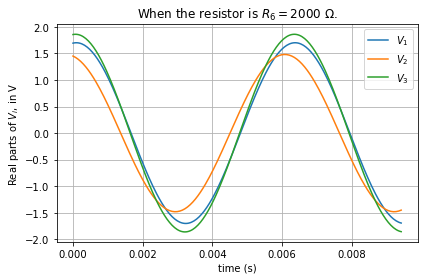

In [23]:
plt.figure()
plt.plot(t, np.real(V1), label='$V_1$')
plt.plot(t, np.real(V2), label='$V_2$')
plt.plot(t, np.real(V3), label='$V_3$')
plt.xlabel('time (s)')
plt.ylabel(r'Real parts of $V_i$, in V')
plt.title(r'When the resistor is $R_6 = 2000$ $\Omega$.')
plt.grid()
plt.legend()
plt.tight_layout()

Now replace the resistor $R_6$ with an inductor $L$.
Set $R_6 = 2$ k$\Omega$, $\omega = 1000$ rad/s , and $L=R_6/\omega = 2$ H, where H is the Henries unit of inductance.

Again, print and calculate the amplitudes and phases of $V_1$, $V_2$, and $V_3$, and plot $V_1$, $V_2$ and $V_3$ as a function of time.

Briefly describe the impact of replacing the resistor $R_6$ by the imaginary impedance of the same magnitude, $i R_6$.

In [24]:
L = R6/omega  # [H] the inductance

X = sl.PartialPivot(CircuitMatrix(1j*omega*L, R, C), v)  # [x1, x2, x3]
V1 = X[0] * np.exp(1j*omega*t)
V2 = X[1] * np.exp(1j*omega*t)
V3 = X[2] * np.exp(1j*omega*t)

print("Amplitudes and phases of voltages with inductor:")
for i in range(3):
    print("  |V{0}| = {1:.2e} V, phi{0}(t=0) = {2} degrees".format(
        i+1, abs(X[i]), int(np.angle(X[i], deg=True))))

Amplitudes and phases of voltages with inductor:
  |V1| = 1.56e+00 V, phi1(t=0) = -4 degrees
  |V2| = 1.50e+00 V, phi2(t=0) = 21 degrees
  |V3| = 2.81e+00 V, phi3(t=0) = 14 degrees


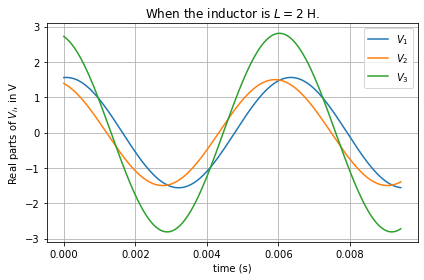

In [25]:
plt.figure()
plt.plot(t, np.real(V1), label='$V_1$')
plt.plot(t, np.real(V2), label='$V_2$')
plt.plot(t, np.real(V3), label='$V_3$')
plt.xlabel('time (s)')
plt.ylabel('Real parts of $V_i$, in V')
plt.title('When the inductor is $L = 2$ H.')
plt.grid()
plt.legend()
plt.tight_layout()

With the imaginary impedance: the amplitude |V3| is larger,  indicating weaker resistance overall.   The signals in V2 and V3 have shifted ahead in phase, due to the inductor. V1 is not affected as much.